In [20]:
from pdf2image import convert_from_path
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Convert PDF to images
pdf_path = "files/file1.pdf"  # Replace with your PDF file path
images = convert_from_path(pdf_path)

# Save images
for i, image in enumerate(images):
    image.save(f"images/page_{i + 1}.png", "PNG")

print("Conversion completed!")

Conversion completed!


Image saved as combined_image.png


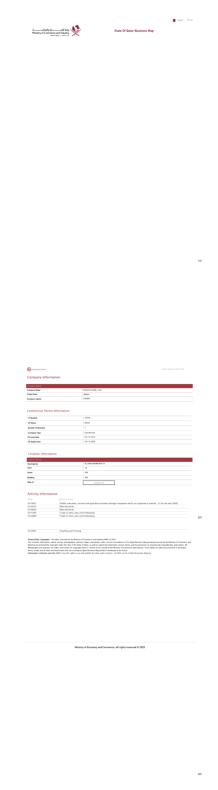

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# Load images dynamically from a folder
image_paths = sorted(glob.glob("images/page_*.png"))  # Sort to maintain order
images = [cv2.imread(path) for path in image_paths]

# Check if all images are loaded properly
images = [img for img in images if img is not None]
if not images:
    raise ValueError("No valid images found!")

# Convert BGR to RGB for correct display in Matplotlib
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]

# Get the minimum width to maintain aspect ratios
min_width = min(img.shape[1] for img in images)

# Resize images to have the same width while keeping the aspect ratio
def resize_to_width(img, width):
    aspect_ratio = img.shape[0] / img.shape[1]  # height / width
    new_height = int(width * aspect_ratio)
    return cv2.resize(img, (width, new_height))

images = [resize_to_width(img, min_width) for img in images]

# Combine images vertically
combined = np.vstack(images)

# Save the combined image
output_path = "combined_image.png"
cv2.imwrite(output_path, cv2.cvtColor(combined, cv2.COLOR_RGB2BGR))

print(f"Image saved as {output_path}")

# Display image using Matplotlib
plt.figure(figsize=(6, 10))  # Adjust figure size
plt.imshow(combined)
plt.axis("off")  # Hide axis
plt.show()


Visualized image saved as visualized_image.png


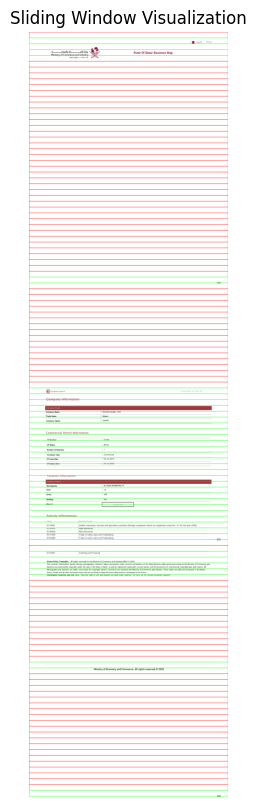

Cropped image saved as cropped_image_without_red_windows.png


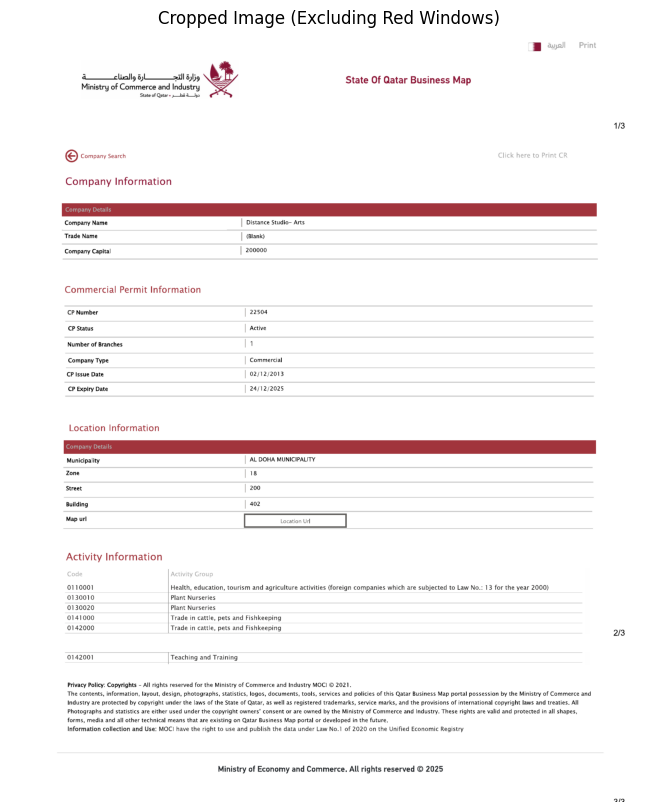

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "combined_image.png"
image = cv2.imread(image_path)

if image is None:
    raise ValueError(f"Failed to load image from {image_path}")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the sliding window parameters
window_height = 50  # Adjust based on image
window_color = (0, 255, 0)  # Green color for normal windows
red_color = (0, 0, 255)  # Red color for fully white sections
thickness = 2  # Thickness of the window border

image_height, image_width = gray.shape

# Clone the original image for visualization
visualized_image = image.copy()
cropped_sections = []  # List to store non-white (green) sections

# Sliding window from top to bottom
for y in range(0, image_height - window_height, window_height):  
    window_region = gray[y:y + window_height, :]
    
    # Check if the window contains only white pixels
    if np.all(window_region >= 240):  # Threshold for white detection
        color = red_color  # Mark as red in visualization
    else:
        color = window_color  # Mark as green in visualization
        cropped_sections.append(image[y:y + window_height, :])  # Store non-white section

    # Draw window rectangles
    cv2.rectangle(visualized_image, (0, y), (image_width, y + window_height), color, thickness)

# Save and display the visualized image
vis_output_path = "visualized_image.png"
cv2.imwrite(vis_output_path, visualized_image)
print(f"Visualized image saved as {vis_output_path}")

# Display visualization
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(visualized_image, cv2.COLOR_BGR2RGB))
plt.title("Sliding Window Visualization")
plt.axis("off")
plt.show()

# Concatenate non-white sections vertically to form the cropped image
if cropped_sections:
    cropped_image = np.vstack(cropped_sections)

    # Save and display the cropped image
    cropped_output_path = "cropped_image_without_red_windows.png"
    cv2.imwrite(cropped_output_path, cropped_image)
    print(f"Cropped image saved as {cropped_output_path}")

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title("Cropped Image (Excluding Red Windows)")
    plt.axis("off")
    plt.show()
else:
    print("No non-white sections found.")
